# Instructions

For this assignment, you will need the following libraries but feel free to use any other library.
* scikit-learn
* mlxtend
* matplotlib
* numpy
* tensorflow

**Write your roll number below, which will be used as a random seed value in the code so that each student's results are different.**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, precision_recall_fscore_support



In [3]:
roll_number = 231453415

In [4]:
# File Paths
weights = '/content/drive/MyDrive/University/Data Mining/Assignment 2/weights.h5'
best_weights = '/content/drive/MyDrive/University/Data Mining/Assignment 2/best_weights.h5'
weightsCNN = '/content/drive/MyDrive/University/Data Mining/Assignment 2/weightsCNN.h5'
best_weightsCNN = '/content/drive/MyDrive/University/Data Mining/Assignment 2/best_weights_CNN.h5'
weightsNorm = '/content/drive/MyDrive/University/Data Mining/Assignment 2/weightsNorm.h5'
best_weightsNorm = '/content/drive/MyDrive/University/Data Mining/Assignment 2/best_weightsNorm.h5'
weightsCNN_Norm = '/content/drive/MyDrive/University/Data Mining/Assignment 2/weightsCNN_Norm.h5'
best_weightsCNN_Norm = '/content/drive/MyDrive/University/Data Mining/Assignment 2/best_weights_CNN_Norm.h5'

# 1- Dataset and Train Test Splits (Already done)
For this, code is already given below. The variable X contains the images. Each image is flattenend in a vector (1D array). There are total 5000 images. Each image has a resolution of 28x28 (which when converted to a vector make 784 dimensions). The variable y has 5000 labels corresponding to each image. The value of labels is between 0-9, representing the handwritten digit it represents. Thus, its a multiclass classification problem where given an input image, we have to predict it's class out of all possible 10 classes.

Execute the following cell to get the data and it's labels.

In [5]:
from mlxtend.data import mnist_data
X, y = mnist_data()

## 1.1- Split the data into train and test partitions

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=roll_number, stratify=y)

# 2- Build Feedforward Neural Network
* Complete the function below that builds and returns a feedforward neurl network
* Use the number of hidden layers and neurons as you see fit.
* Use appropriate activation function for each hidden layer and the output layer
* After the model is returned, compile it using appropriate loss function and the optimizer. Stochastic Gradient Decent (SGD) is also available with tensorflow but there are some other fancier optimizers as well. See following links for available layers, loss functions, activation functions, and optimizers:

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

https://www.tensorflow.org/api_docs/python/tf/keras/losses

https://www.tensorflow.org/api_docs/python/tf/keras/layers

https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [7]:
y_trainC = to_categorical(y_train,dtype='float32')
y_testC = to_categorical(y_test,dtype='float32')

In [8]:
def get_model(input_shape = (None, 784, None), nbr_classes = 10):
    # To do: Define model using functional API of tensorflow keras (not sequential)
    ''' input_shape: Used to define the input shape of the model in Input layer
        nbr_classes: Used to define the number of neurons of the last layer
    '''
    model1 = Input(shape=(input_shape[1],))
    model2 = Dense(128, activation='ReLU')(model1)
    model3 = BatchNormalization()(model2)
    modeld1 = Dropout(0.5)(model3)
    model4 = Dense(64, activation='ReLU')(modeld1)
    model5 = BatchNormalization()(model4)
    modeld2 = Dropout(0.5)(model5)
    model6 = Dense(64, activation='ReLU')(modeld2)
    model7 = BatchNormalization()(model6)
    model8 = Dense(nbr_classes, activation='Softmax')(model7)
    model = Model(inputs=model1, outputs=model8)
    return model

## 2.1 Define Early Stopping and Checkpoints

Suppose we train the model for 1000 epochs. But we do not know at which epoch the learned weights are giving us the best performance. Thus, after each epoch, we check the loss on validation/test dataset and if it decreases from previous epoch, we save weights as a checkpoint. Furthermore, it is not necessary that after each epoch, we get better results. So, it makes sense that if validation loss is not decreasing since, lets say, 10 epochs, we should stop further training (called early stopping i.e., not going through all 1000 epochs as there is no point).

* Implement early stopping and model checkpoints callbacks.
* Monitor validation loss after each epoch and if it does not decrease for 10 epochs, stop training.
* Monitor validation loss after each epoch and if the loss decreases since previous epoch, save a checkpoint.

See following links:

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

In [9]:
# to do: define callbacks
checkpointer = ModelCheckpoint(monitor = 'val_loss', mode = 'min', filepath = best_weights, save_best_only = True)
earlyStopping= EarlyStopping(monitor="val_loss",patience=30)


## 2.2 Train The model

* Fit the model define and compiled above.
* Use appropriate batch size that fits your computer's memory.
* Use testing data split above as validation.
* Shuffle training data after every epoch.
* Use callbacks defined above in fit function.
* **Note:** You might need to one-hot encode the labels

In [10]:
model = get_model()
try:
  model.load_weights(best_weights)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [11]:
# To do: compile the model with appropriate loss function
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(X_train, y_trainC, validation_data=(X_test, y_testC), batch_size=64, epochs=200, callbacks=[checkpointer, earlyStopping])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                             

In [12]:
model.save_weights(weights)

## 2.3 Predictions

* Load the best checkpoints saved in above step.
* Use this checkpoint to get predictions
* Get class labels
* Plot confusion matrix just like Assignment 1
* Calculate macro precision, macro recall, and macro f1-score just like Assignment 1 and save it in a variable so that we can plot it later for comparison.

In [13]:
model = get_model()
try:
  model.load_weights(best_weights)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [14]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
y_pred = np.argmax(model.predict(X_test), axis=1)

In [15]:
def conMat(test, pred): # Confusion matrix display function
    con_matrix = confusion_matrix(test, pred)
    print("\nConfusion Matrix: ")
    con_matrix = ConfusionMatrixDisplay(con_matrix)
    con_matrix.plot()
    plt.show()


Confusion Matrix: 


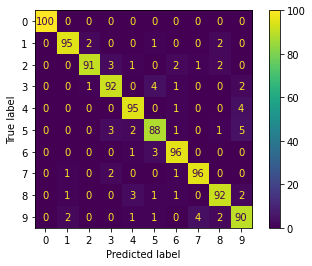


Accuracy:  0.935

Classwise Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.96      0.95      0.95       100
           2       0.97      0.91      0.94       100
           3       0.92      0.92      0.92       100
           4       0.92      0.95      0.94       100
           5       0.90      0.88      0.89       100
           6       0.93      0.96      0.95       100
           7       0.95      0.96      0.96       100
           8       0.93      0.92      0.92       100
           9       0.87      0.90      0.89       100

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000


Macro Average Evaluation Metrics:

Precision: 0.9353583568256113
Recall: 0.9350000000000002
F1 score: 0.9350126990711374
Support: None


In [16]:
conMat(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
print("\nAccuracy: ", accuracy)
print("\nClasswise Classification Report: \n", c_report)


modelMac = {}
modelMac['precision'], modelMac['recall'], modelMac['f1score'], modelMac['support'] = precision_recall_fscore_support(y_test, y_pred, average = 'macro')

print("\nMacro Average Evaluation Metrics:")
print("\nPrecision:", modelMac['precision'])
print("Recall:", modelMac['recall'])
print("F1 score:", modelMac['f1score'])
print("Support:", modelMac['support'])

# 3- Convolutional Neural Networks

* Now reshape all the training and testing images to 28x28x1 (as these are grayscale images, there would be just 1 channel)
* Define a 2D convolutional neural network instead of feedforward network. 
* **Hint**: Note that the output layer would still be a Dense layer.
* Repeat 2.1, 2.2, and 2.3 from above but this time, use CNN model instead.

**Useful links:**

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization

In [17]:
X_trainCNN=[]
X_testCNN=[]
for i in range(len(X_train)):
  X_trainCNN.append(X_train[i].reshape((28,28,1)))
for i in range(len(X_test)):
  X_testCNN.append(X_test[i].reshape((28,28,1)))

X_trainCNN=np.array(X_trainCNN)
X_testCNN=np.array(X_testCNN)


In [18]:
def get_cnn_model(input_shape = (None, None, None), nbr_classes = 10):
    # To do: Define model using functional API of tensorflow keras (not sequential)
    ''' input_shape: Used to define the input shape of the model in Input layer
        nbr_classes: Used to define the number of neurons of the last layer
    '''
    model1 = Input(shape=(28,28,1))
    model2 = Conv2D(64, kernel_size=3, padding='same', activation='ReLU')(model1)
    model3 = BatchNormalization()(model2)
    model4 = MaxPooling2D(pool_size=(16, 16),strides=(1, 1), padding='same')(model3)
    model5 = Conv2D(64, kernel_size=3, padding='same', activation='ReLU')(model4)
    model6 = BatchNormalization()(model5)
    model7 = MaxPooling2D(pool_size=(8, 8),strides=(2, 2), padding='same')(model6)
    model8 = Flatten()(model7)
    model9 = Dense(128, activation="ReLU")(model8)
    model10 = BatchNormalization()(model9)
    model11 = Dense(64,activation="ReLU")(model10)
    model12 = BatchNormalization()(model11)
    model13 = Dense(64,activation="ReLU")(model12)
    model14 = BatchNormalization()(model13)
    model15=  Dense(nbr_classes,activation='softmax')(model14)
    model = Model(inputs=model1,outputs=model15)
    return model

In [19]:
checkpointerCNN = ModelCheckpoint(monitor = 'val_loss', mode = 'min', filepath = best_weightsCNN, save_best_only = True)
earlyStoppingCNN = EarlyStopping(monitor="val_loss",patience=30)

In [20]:
modelcnn = get_cnn_model()
try:
  modelcnn.load_weights(best_weightsCNN)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [21]:
modelcnn.summary()
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history2 = modelcnn.fit(X_trainCNN, y_train, validation_data=(X_testCNN, y_test), batch_size=16, epochs=200, callbacks=[checkpointerCNN, earlyStoppingCNN])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 64)       256 

In [22]:
modelcnn.save_weights(weightsCNN)

In [23]:
modelcnn = get_cnn_model()
try:
  modelcnn.load_weights(best_weightsCNN)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [24]:
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
y_predcnn = np.argmax(modelcnn.predict(X_testCNN), axis=1)


Confusion Matrix: 


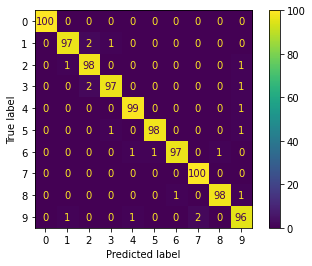


Accuracy:  0.98

Classwise Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      0.97      0.97       100
           2       0.96      0.98      0.97       100
           3       0.98      0.97      0.97       100
           4       0.98      0.99      0.99       100
           5       0.99      0.98      0.98       100
           6       0.99      0.97      0.98       100
           7       0.98      1.00      0.99       100
           8       0.99      0.98      0.98       100
           9       0.95      0.96      0.96       100

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Macro Average Evaluation Metrics:

Precision: 0.9801059397656452
Recall: 0.9800000000000001
F1 score: 0.9800090516814375
Support: None


In [25]:
conMat(y_test, y_predcnn)

accuracycnn = accuracy_score(y_test, y_predcnn)
c_reportcnn = classification_report(y_test, y_predcnn)
print("\nAccuracy: ", accuracycnn)
print("\nClasswise Classification Report: \n", c_reportcnn)


modelMacCNN = {}
modelMacCNN['precision'], modelMacCNN['recall'], modelMacCNN['f1score'], modelMacCNN['support'] = precision_recall_fscore_support(y_test, y_predcnn, average = 'macro')

print("\nMacro Average Evaluation Metrics:")
print("\nPrecision:", modelMacCNN['precision'])
print("Recall:", modelMacCNN['recall'])
print("F1 score:", modelMacCNN['f1score'])
print("Support:", modelMacCNN['support'])

# 4- Data Normalization
* Now normalize the train and test images by dividing them with 255.0
* This will convert the image pixel values between 0 and 1
* Repeat Task 2 and 3 again on this normalized data

In [26]:
from sklearn.preprocessing import MinMaxScaler

**Task 4 Part 2**


In [27]:
checkpointerNorm = ModelCheckpoint(monitor = 'val_loss', mode = 'min', filepath = best_weightsNorm, save_best_only = True)
earlyStoppingNorm = EarlyStopping(monitor="val_loss",patience=30)

In [28]:
scaler = MinMaxScaler((-1,1))
scaler2 = MinMaxScaler((-1,1))
scaler.fit(X_train)
scaler2.fit(X_test)
X_trainNorm = scaler.transform(X_train)
X_testNorm = scaler2.transform(X_test)

In [29]:
modelNorm = get_model()
try:
  modelNorm.load_weights(best_weightsNorm)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [30]:
modelNorm.summary()
modelNorm.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history3 = modelNorm.fit(X_trainNorm, y_trainC, validation_data=(X_testNorm, y_testC), batch_size=64, epochs=200, callbacks=[checkpointerNorm, earlyStoppingNorm])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                          

In [31]:
modelNorm.save_weights(weightsNorm)

In [32]:
modelNorm = get_model()
try:
  modelNorm.load_weights(best_weightsNorm)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [33]:
modelNorm.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
y_predNorm = np.argmax(modelNorm.predict(X_testNorm), axis=1)


Confusion Matrix: 


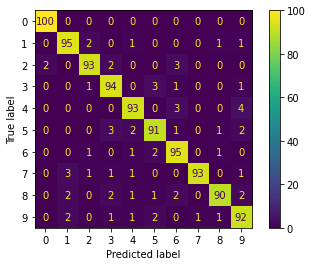


Accuracy:  0.936

Classwise Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.93      0.95      0.94       100
           2       0.95      0.93      0.94       100
           3       0.91      0.94      0.93       100
           4       0.93      0.93      0.93       100
           5       0.92      0.91      0.91       100
           6       0.90      0.95      0.93       100
           7       0.99      0.93      0.96       100
           8       0.96      0.90      0.93       100
           9       0.89      0.92      0.91       100

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000


Macro Average Evaluation Metrics Normalized:

Precision: 0.9367331875029656
Recall: 0.9359999999999999
F1 score: 0.9360599394730427
Support: None


In [34]:
conMat(y_test, y_predNorm)

accuracy3 = accuracy_score(y_test, y_predNorm)
c_report3 = classification_report(y_test, y_predNorm)
print("\nAccuracy: ", accuracy3)
print("\nClasswise Classification Report: \n", c_report3)


modelMacNorm = {}
modelMacNorm['precision'], modelMacNorm['recall'], modelMacNorm['f1score'], modelMacNorm['support'] = precision_recall_fscore_support(y_test, y_predNorm, average = 'macro')

print("\nMacro Average Evaluation Metrics Normalized:")
print("\nPrecision:", modelMacNorm['precision'])
print("Recall:", modelMacNorm['recall'])
print("F1 score:", modelMacNorm['f1score'])
print("Support:", modelMacNorm['support'])

**Task 4 Part 3**


In [35]:
X_trainCNN_Norm=[]
X_testCNN_Norm=[]
for i in range(len(X_trainNorm)):
  X_trainCNN_Norm.append(X_trainNorm[i].reshape((28,28,1)))
for i in range(len(X_testNorm)):
  X_testCNN_Norm.append(X_testNorm[i].reshape((28,28,1)))

X_trainCNN_Norm=np.array(X_trainCNN_Norm)
X_testCNN_Norm=np.array(X_testCNN_Norm)

In [36]:
checkpointerCNN_Norm = ModelCheckpoint(monitor = 'val_loss', mode = 'min', filepath = best_weightsCNN_Norm, save_best_only = True)
earlyStoppingCNN_Norm = EarlyStopping(monitor="val_loss",patience=30)

In [37]:
modelcnnNorm = get_cnn_model()
try:
  modelcnnNorm.load_weights(best_weightsCNN_Norm)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [38]:
modelcnnNorm.summary()
modelcnnNorm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history4 = modelcnnNorm.fit(X_trainCNN_Norm, y_train, validation_data=(X_testCNN_Norm, y_test), batch_size=16, epochs=200, callbacks=[checkpointerCNN_Norm, earlyStoppingCNN_Norm])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_22 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_23 (Bat  (None, 28, 28, 64)       256 

In [39]:
modelcnnNorm.save_weights(weightsCNN_Norm)

In [40]:
modelcnnNorm = get_cnn_model()
try:
  modelcnnNorm.load_weights(best_weightsCNN_Norm)
  print("Weights Loaded Successfully")
except:
  print("Weights are not initialized")

Weights Loaded Successfully


In [41]:
modelcnnNorm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
y_predcnnNorm = np.argmax(modelcnnNorm.predict(X_testCNN_Norm), axis=1)


Confusion Matrix: 


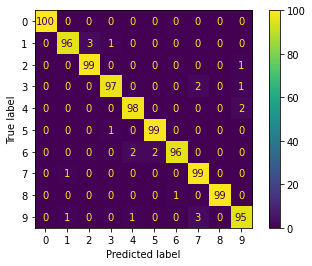


Accuracy:  0.978

Classwise Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      0.96      0.97       100
           2       0.97      0.99      0.98       100
           3       0.98      0.97      0.97       100
           4       0.97      0.98      0.98       100
           5       0.98      0.99      0.99       100
           6       0.99      0.96      0.97       100
           7       0.95      0.99      0.97       100
           8       1.00      0.99      0.99       100
           9       0.96      0.95      0.95       100

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Macro Average Evaluation Metrics:

Precision: 0.9781682859500263
Recall: 0.978
F1 score: 0.9779924634686182
Support: None


In [42]:
conMat(y_test, y_predcnnNorm)

accuracycnnNorm = accuracy_score(y_test, y_predcnnNorm)
c_reportcnnNorm = classification_report(y_test, y_predcnnNorm)
print("\nAccuracy: ", accuracycnnNorm)
print("\nClasswise Classification Report: \n", c_reportcnnNorm)


modelMacCNN_Norm = {}
modelMacCNN_Norm['precision'], modelMacCNN_Norm['recall'], modelMacCNN_Norm['f1score'], modelMacCNN_Norm['support'] = precision_recall_fscore_support(y_test, y_predcnnNorm, average = 'macro')

print("\nMacro Average Evaluation Metrics:")
print("\nPrecision:", modelMacCNN_Norm['precision'])
print("Recall:", modelMacCNN_Norm['recall'])
print("F1 score:", modelMacCNN_Norm['f1score'])
print("Support:", modelMacCNN_Norm['support'])

# 5- Results and Comparisons
* Plot macro precision, recall, and f1-score for all four experiments above and compare them via barplots, just like Assignment 1

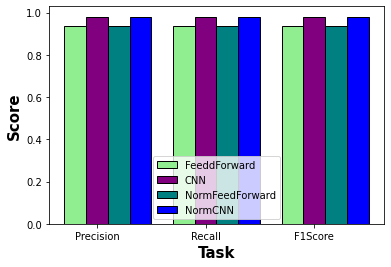

In [43]:
x_axis = np.arange(3)
data1 = np.array([modelMac['precision'], modelMac['recall'], modelMac['f1score']])
data2 = np.array([modelMacCNN['precision'], modelMacCNN['recall'], modelMacCNN['f1score']])
data3 = np.array([modelMacNorm['precision'], modelMacNorm['recall'], modelMacNorm['f1score']])
data4 = np.array([modelMacCNN_Norm['precision'], modelMacCNN_Norm['recall'], modelMacCNN_Norm['f1score']])


plt.bar(x_axis - 0.2, data1, color='lightgreen', width=0.2, edgecolor='black')
plt.bar(x_axis + 0.0, data2, color='purple', width=0.2, edgecolor='black')
plt.bar(x_axis + 0.2, data3, color='teal', width=0.2, edgecolor='black')
plt.bar(x_axis + 0.40, data4, color='blue', width=0.2, edgecolor='black')

plt.xlabel('Task', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks(x_axis, ['Precision', 'Recall', 'F1Score'])
plt.legend(["FeeddForward", "CNN", "NormFeedForward", "NormCNN"])
plt.show()

# 6- Discussion

* What difference did it make after data normalization? Was the convergence faster or slower? Did it affect the performance of the models?
* Why we had to reshape the image from 784 to 28x28x1 when using CNN?
* How many optimizers did you try and which one performed the best? By what metric, did you measure the performance?
* What was the activation of the last layer in each model?
* How many neurons were there in the last (output) layer of each model?
* Why labels had to be one-hot encoded?

Your comments go here...

1. There was no major difference detected between both of the training techniques. The results of the performance metrics did increase but only by a little amount. The convergence however, was a little faster and it took a few less epochs to converge after the data normalization.

2. A CNN uses more than one dimensions when it comes to training because of the filter that it has to apply on the image data using the maxpooling layer. This is why an image of size 784 was not acceptable and had to be converted into 28x28 for Conv1D and 28x28x1 for Conv2D.

3. Used two main optimizer functions. Used SGD first and then Adam with a learning rate of 1e-4. The Adam optimizer performed way better in terms of value loss and accuracy.

4. Used categorical crossentropy for the feed forward networks and sparse categorical crossentropy for the CNNs.

5. There were 10 output neurons in the last output layer of each model.

6. One hot encoding the labels allows the training data to be made more useful with more information available for the model to train on. Moreover, this data can be easily rescaled because of one hot encoding. Lastly, one hot encoding allows the model to predict better results instead of using single labels.





